# [CM6] Naive Bayes Classifer


Importing all necessary libraries.

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

In [90]:
covid_dataset = pd.read_csv("cleaned_normalized_coviddata.csv")
x = covid_dataset.iloc[:,2:-3]
y = covid_dataset.iloc[:,-3:].astype(int)
var_smoothing_list = [1e-10,1e-9, 1e-5, 1e-3, 1e-1,0.1,0.5,0.75,1]


## Label : Recovered

In [91]:
accuracies_recovered = []
for i in range(0,len(var_smoothing_list)):
    classifier_gaussian_recovered = GaussianNB(var_smoothing = var_smoothing_list[i])
    scores = cross_val_score(classifier_gaussian_recovered,x,y.loc[:,'Recovered'],cv=10)
    accuracies_recovered.append(scores.mean())
accuracies_recovered


[0.7028985507246377,
 0.7028985507246377,
 0.7028985507246377,
 0.7028985507246377,
 0.7144927536231884,
 0.7144927536231884,
 0.7007246376811593,
 0.6927536231884058,
 0.6927536231884058]

Text(0, 0.5, 'Mean Accuracy for Label:Recovered')

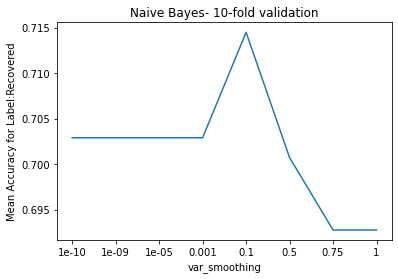

In [70]:
#Plotting the mean accuracy versus the var_smoothing
var = []
for i in var_smoothing_list:
    var.append(str(i))
plt.title("Naive Bayes- 10-fold validation")
plt.plot(var, accuracies_recovered)
plt.xlabel('var_smoothing')
plt.ylabel('Mean Accuracy for Label:Recovered')

#### The maximum accuracy occurs when var_smoothing = 1e -1 for label: recovered

## Performance measure for Label: Recovered

In [71]:
y_pred = cross_val_predict(classifier_gaussian_recovered,x,y.loc[:,'Recovered'],cv=10)
y_pred.shape

(1380,)

### F1 score

In [72]:
fsc = f1_score(y.loc[:,'Recovered'], y_pred,average='micro')
print('F-score of covid dataset for recovered label is:',fsc)

F-score of covid dataset for recovered label is: 0.6927536231884058


### AUC Score

In [73]:
auc_covid = roc_auc_score(y.loc[:,'Recovered'],y_pred,average='weighted')
print('AUC of covid dataset for recovered label is:', auc_covid)

AUC of covid dataset for recovered label is: 0.6004656546080964


### ROC curve

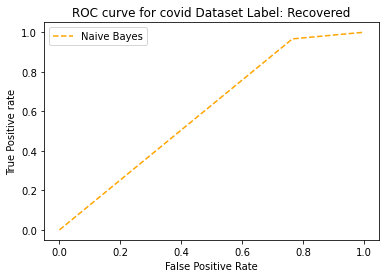

In [74]:
# roc curve
fpr1, tpr1, thresh1 = roc_curve(y.loc[:,'Recovered'],y_pred, pos_label=1)
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Naive Bayes')
plt.title('ROC curve for covid Dataset Label: Recovered')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();

## Label : Deaths

In [75]:
accuracies_deaths = []
for i in range(0,len(var_smoothing_list)):
    classifier_gaussian_deaths = GaussianNB(var_smoothing = var_smoothing_list[i])
    scores = cross_val_score(classifier_gaussian_deaths,x,y.loc[:,'Deaths'],cv=10)
    accuracies_deaths.append(scores.mean())
accuracies_deaths

[0.6507246376811594,
 0.6507246376811594,
 0.6507246376811594,
 0.6528985507246376,
 0.7239130434782608,
 0.7239130434782608,
 0.8442028985507246,
 0.8905797101449275,
 0.886231884057971]

Text(0, 0.5, 'Mean Accuracy for Label:Deaths')

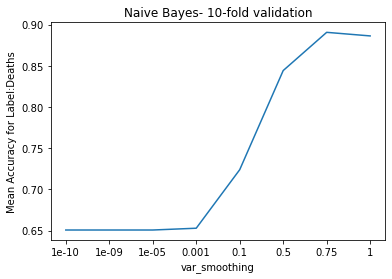

In [76]:
#Plotting the mean accuracy versus the var_smoothing
var = []
for i in var_smoothing_list:
    var.append(str(i))
plt.title("Naive Bayes- 10-fold validation")
plt.plot(var, accuracies_deaths)
plt.xlabel('var_smoothing')
plt.ylabel('Mean Accuracy for Label:Deaths')

#### The maximum accuracy occurs when var_smoothing = 0.75 for label: Deaths

## Performance measure for Label: Deaths

In [77]:
y_pred = cross_val_predict(classifier_gaussian_deaths,x,y.loc[:,'Deaths'],cv=10)
y_pred.shape

(1380,)

### F1 score

In [78]:
fsc = f1_score(y.loc[:,'Deaths'], y_pred,average='micro')
print('F-score of covid dataset for Deaths label is:',fsc)

F-score of covid dataset for Deaths label is: 0.886231884057971


### AUC Score

In [79]:
auc_covid = roc_auc_score(y.loc[:,'Deaths'],y_pred,average='weighted')
print('AUC of covid dataset for deaths label is:', auc_covid)

AUC of covid dataset for deaths label is: 0.6192665973141669


### ROC curve

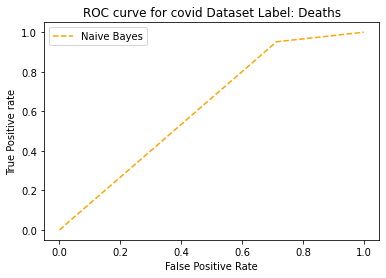

In [80]:
# roc curve
fpr1, tpr1, thresh1 = roc_curve(y.loc[:,'Deaths'],y_pred, pos_label=1)
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Naive Bayes')
plt.title('ROC curve for covid Dataset Label: Deaths')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();

## Label: Confirmed

In [81]:
accuracies_confirmed = []
for i in range(0,len(var_smoothing_list)):
    classifier_gaussian_confirmed = GaussianNB(var_smoothing = var_smoothing_list[i])
    scores = cross_val_score(classifier_gaussian_confirmed,x,y.loc[:,'Confirmed'],cv=10)
    accuracies_confirmed.append(scores.mean())
accuracies_confirmed

[0.7028985507246376,
 0.7028985507246376,
 0.7028985507246376,
 0.7021739130434782,
 0.7913043478260869,
 0.7913043478260869,
 0.9391304347826088,
 0.9565217391304349,
 0.9579710144927537]

Text(0, 0.5, 'Mean Accuracy for Label:Confirmed')

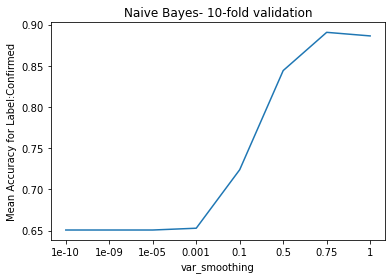

In [84]:
#Plotting the mean accuracy versus the var_smoothing
var = []
for i in var_smoothing_list:
    var.append(str(i))
plt.title("Naive Bayes- 10-fold validation")
plt.plot(var, accuracies_deaths)
plt.xlabel('var_smoothing')
plt.ylabel('Mean Accuracy for Label:Confirmed')

### The maximum accuracy occurs when var_smoothing = 1 for label: Confirmed

## Performance measure for Label: Confirmed

In [85]:
y_pred = cross_val_predict(classifier_gaussian_confirmed,x,y.loc[:,'Confirmed'],cv=10)
y_pred.shape

(1380,)

### F1 score

In [86]:
fsc = f1_score(y.loc[:,'Confirmed'], y_pred,average='micro')
print('F-score of covid dataset for recovered label is:',fsc)

F-score of covid dataset for recovered label is: 0.9579710144927536


### AUC Score

In [87]:
auc_covid = roc_auc_score(y.loc[:,'Confirmed'],y_pred,average='weighted')
print('AUC of covid dataset for confirmed label is:', auc_covid)

AUC of covid dataset for confirmed label is: 0.5822157305360067


### ROC curve

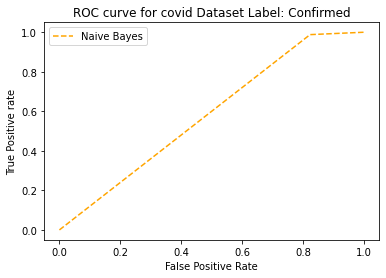

In [88]:
# roc curve
fpr1, tpr1, thresh1 = roc_curve(y.loc[:,'Confirmed'],y_pred, pos_label=1)
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Naive Bayes')
plt.title('ROC curve for covid Dataset Label: Confirmed')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();

## Impact of the smoothing parameter

### In gaussian distribution, we have two parameters that define it, namely mean(mu) and variance(sigma). The sigma term occurrs in the denominator, so it is vital to account for 0 variance in order to ensure mathematical calculation stability. This is analogous to the concept of Laplace smoothing but is more specific to gaussian distribution.
### Through Naive Bayes, we are essentially estimating the mean and variance of the underlying distribution of the atrtibutes. Setting a very small value of var_smoothing does not alter the estimated variance much. The cavieat here is that one can see from the below set of values that the categorical inputs sometimes tend to have very less variance due to the nature of the encoding (one-hot). This will also depend on the frequency of occurrence of a categorical item. This is where var_smoothing comes in. var_smoothing can be considered as a tuning parameter that decides the quantum of variance we add to all the parameters. So we are artificially boosting variance. This essentially gives better shape(gaussian like) to features and helps us deal with mathematical complications of very small variance. However after a certain values, the accuracy decreases.